# Learning classification from first principles

*Alípio Jorge*

*March 2021*

# Logistic Regression

- Given a set of points $X$ with classes $Y$ 
    - Assume binary classification
- We want a function $f(x)$ that finds $y$ that maximizes $\Pr(Y=y|X=x)$

## Defining $f$

- Models an output $0 \leq p(x) \leq 1$ such that
    - $f(x)==class_1$ if $p(x) > 0.5$
    - $f(x)==class_2$ if $p(x) \leq 0.5$
    
- To **directly approximate** the Bayesian Classifier
    - $p(x) \approxeq \Pr(Y=class_1 | X=x)$



# Logistic Regression

- Consider

$$
p(x) = \beta_0+\beta_1x
$$

- This **approximates** what we want
    - We used that in the first lecture
- But it **does not model a probability**
    - $p(x)$ can give any real value
    - it is an **ad-hoc** solution


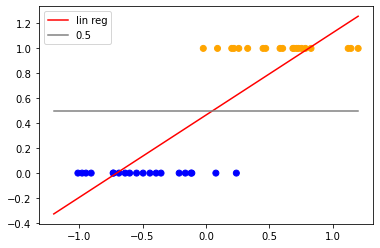

In [73]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colors

classize=20
blues = np.random.random_sample(classsize)-0.8
oranges = np.random.random_sample(classsize)-0.2
blues = np.random.normal(-0.5,0.3,classsize)
oranges = np.random.normal(0.5,0.3,classsize)


x=np.concatenate((blues,oranges))
y=[0]*classsize+[1]*classsize

cmap = colors.ListedColormap(['blue','orange'])

plt.scatter(x,y,color=cmap(y))

from sklearn.linear_model import LinearRegression

X=x[:,np.newaxis]

lnr=LinearRegression().fit(X,y)
x_show=np.array([-1.2,1.2])
y_show=lnr.predict(x_show[:,np.newaxis])
plt.plot(x_show,y_show,color='red')
plt.plot(x_show,[0.5,0.5],color='grey')
plt.legend(['lin reg','0.5']);



# Logistic Regression

- The trick is to **transform** the linear output into a value in $[0,1]$

$$
p(x)=\frac{e^{\beta_0+\beta_1x}}{1+e^{\beta_0+\beta_1x}}
$$

- $p(x)$ is now the **logistic function**
    - Also know as the sigmoid
- The logistic function is convenient to approximate the Bayes Classifier


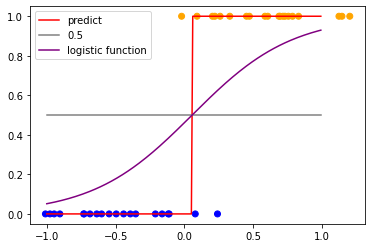

In [74]:
from sklearn.linear_model import LogisticRegression

logr=LogisticRegression().fit(X,y)
x_show=np.arange(-1,1,0.01)
y_show=logr.predict(x_show[:,np.newaxis])
plt.scatter(x,y,color=cmap(y))
plt.plot(x_show,y_show,color='red')
plt.plot(x_show,[0.5]*len(x_show),color='grey')

expy=np.exp(logr.intercept_+logr.coef_[0]*x_show)
plt.plot(x_show,expy/(1+expy),color='purple')
plt.legend(['predict','0.5','logistic function']);

# Logistic Regression

## Fitting

- How can we now find the parameters $\beta$?
    - Use Maximum Likelihood

- The likelihood of the parameters $\beta$:

$$
Lkl(\beta_0,\beta_1)=\prod_{i:y_i=class_1} p(x_i:\beta_0,\beta_1) \prod_{i:y_i=class_2} (1-p(x_i:\beta_0,\beta_1)) 
$$
    
- Then (4.4.1 of Elements of Statistical Learning)
    - We replace $p(x)$ by the logistic expression
    - Derive the log Likelihood
    - Equal to zero
    - Obtain a closed form for the update equations
    - Use an iterative algorithm (solver) for the maximization





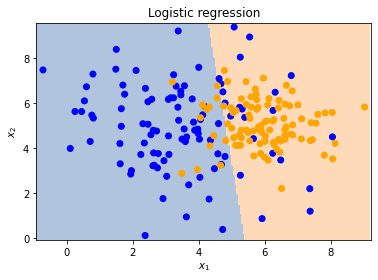

In [75]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_classifier_boundary(model,X,h = .05):
    # this function can be used with any sklearn classifier
    # ready for two classes but can be easily extended
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
    y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
    # generate a grid with step h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))
    
n_points=100
std1=2
std2=1

X,y = make_blobs(n_samples=[n_points,n_points], centers=[(3,5),(6,5)], 
                 n_features=2, cluster_std=[std1,std2],
                 random_state=1, shuffle=False)

cmap = colors.ListedColormap(['blue','orange'])

logr=LogisticRegression().fit(X,y)

plot_classifier_boundary(logr,X)

plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.title('Logistic regression')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

# Discriminant Analysis

- Given a set of points $X$ with classes $Y$ 
    - Assume binary classification
- We want a function $f(x)$ that finds $y$ that maximizes $\Pr(Y=y|X=x)$

## The general idea

- Suppose we know the exact distribution of the points in $X$ for each class
    - $\Pr(X=x|Y=class_1)$ and $\Pr(X=x|Y=class_2)$ 
- Suppose we have 1 predictor

- Given a point $x$ we can use the Bayes theorem

$$
\Pr(Y=k|X=x)=\frac{\Pr(X=x|Y=k)\Pr(Y=k)}{\Pr(X=x)}
$$



# Discriminant Analysis

- Given a set of points $X$ with classes $Y$ we don't know the true probabilities
- We estimate them from the data
    - $\Pr(Y=k)$ from the proportion of the classes
    - We assume that $\Pr(X=x|Y=k)$ is Gaussian
        - estimate **parameters**:
        - $\mu_k$ from the points in each class
        - $\sigma^2$ by averaging the $\sigma^2_k$ for each class
    - We do not need to know $\Pr(X=x)$

- If we have more than one attribute in $X$
    - We estimate **covariance** instead of variance

# Discriminant Analysis

## Linear Discriminant Analysis

- We assume that all the densities $\Pr(X=x|Y=k)$ have the same **covariance**
    - This results in linear boundaries

## Quadratic Discriminant Analysis

- We relax the assumption of same covariance for each class
    - This results in quadratic boundaries

    

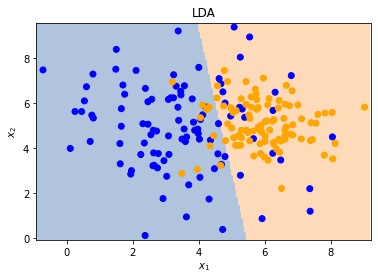

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

n_points=100
std1=2
std2=1

X,y = make_blobs(n_samples=[n_points,n_points], centers=[(3,5),(6,5)], 
                 n_features=2, cluster_std=[std1,std2],
                 random_state=1, shuffle=False)

discr=LDA().fit(X,y)

plot_classifier_boundary(discr,X)

plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.title('LDA')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');


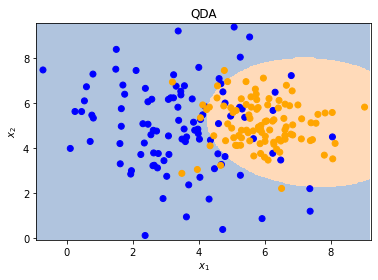

In [83]:
discr=QDA().fit(X,y)

plot_classifier_boundary(discr,X)

plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.title('QDA')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');


# Discriminant Analysis

## Linear vs Quadratic

- The **bias-variance trade-off**
    - LDA is less expressive
        - higher bias, lower variance
    - QDA is more expressive
        - more parameters (covariances) to estimate
        - lower bias, higher variance

# Logistic Regression vs Linear Discriminant Analysis

- Assumptions
    - If LDA assumptions hold: LDA is probably better
    - Otherwise: Log Reg is probably better

- Principles
    - Logistic regression obtained using Maximum Likelihood
    - Discriminant analysis obtained from the Bayes Theorem



# Bibliography

- Hastie, T., Tibshirani, R., Friedman, J. (2008). The Elements of Statistical Learning, Second Edition. New York, NY, USA: Springer New York Inc.
- An Introduction to Statistical Learning, James, Witten, Hastie, Tibshirani. Springer. 